In [4]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [5]:
#Read data

df = pd.read_csv(r"C:\Users\HARSH\Downloads\movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Checking missing Columns

for col in df.columns:
    print(col, " : ", np.mean(df[col].isnull()), "%")

name  :  0.0 %
rating  :  0.010041731872717789 %
genre  :  0.0 %
year  :  0.0 %
released  :  0.0002608242044861763 %
score  :  0.0003912363067292645 %
votes  :  0.0003912363067292645 %
director  :  0.0 %
writer  :  0.0003912363067292645 %
star  :  0.00013041210224308815 %
country  :  0.0003912363067292645 %
budget  :  0.2831246739697444 %
gross  :  0.02464788732394366 %
company  :  0.002217005738132499 %
runtime  :  0.0005216484089723526 %


In [7]:
# Removing missing columns

df.dropna(inplace = True)

In [8]:
# Checking missing Columns after Removal

for col in df.columns:
    print(col, " : ", np.mean(df[col].isnull()), "%")

name  :  0.0 %
rating  :  0.0 %
genre  :  0.0 %
year  :  0.0 %
released  :  0.0 %
score  :  0.0 %
votes  :  0.0 %
director  :  0.0 %
writer  :  0.0 %
star  :  0.0 %
country  :  0.0 %
budget  :  0.0 %
gross  :  0.0 %
company  :  0.0 %
runtime  :  0.0 %


In [9]:
# Removing "Not Rated" Columns

for idx in df.index:
  if df.loc[idx, "rating"] in ["Unrated", "Not Rated"] :
    df.drop(idx, inplace = True)

In [1]:
if 2 in [1, 2]:
    print("Yes")

Yes


In [10]:
# Correcting Year

for idx in df.index:
    released_year = df.loc[idx, 'released'].split(', ')[-1]
    df.loc[idx, 'year'] = released_year[:4]

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5360 entries, 0 to 7651
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5360 non-null   object 
 1   rating    5360 non-null   object 
 2   genre     5360 non-null   object 
 3   year      5360 non-null   object 
 4   released  5360 non-null   object 
 5   score     5360 non-null   float64
 6   votes     5360 non-null   float64
 7   director  5360 non-null   object 
 8   writer    5360 non-null   object 
 9   star      5360 non-null   object 
 10  country   5360 non-null   object 
 11  budget    5360 non-null   float64
 12  gross     5360 non-null   float64
 13  company   5360 non-null   object 
 14  runtime   5360 non-null   float64
dtypes: float64(5), object(10)
memory usage: 799.0+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Sorting the database by "gross" value from high to low

df.sort_values(by=["gross"], inplace = True, ascending = False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [12]:
# Reseting the indexes of the datafram

df.reset_index(inplace = True, drop=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [13]:
# Removing Duplicates

df.drop_duplicates()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5360 non-null   object 
 1   rating    5360 non-null   object 
 2   genre     5360 non-null   object 
 3   year      5360 non-null   object 
 4   released  5360 non-null   object 
 5   score     5360 non-null   float64
 6   votes     5360 non-null   float64
 7   director  5360 non-null   object 
 8   writer    5360 non-null   object 
 9   star      5360 non-null   object 
 10  country   5360 non-null   object 
 11  budget    5360 non-null   float64
 12  gross     5360 non-null   float64
 13  company   5360 non-null   object 
 14  runtime   5360 non-null   float64
dtypes: float64(5), object(10)
memory usage: 628.2+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


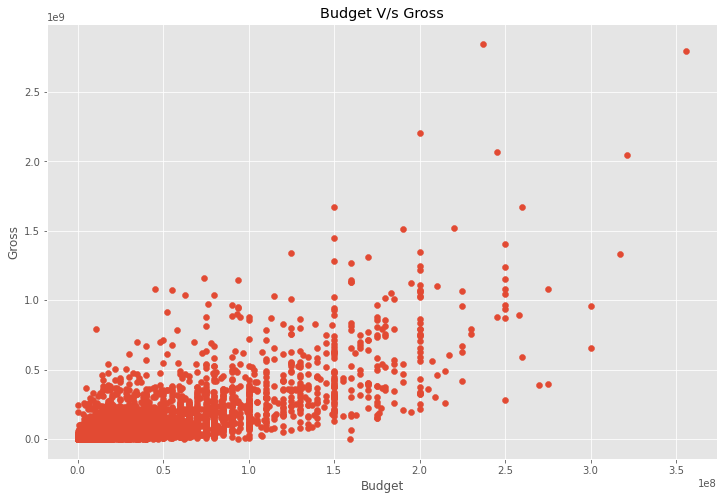

In [14]:
# scatter plot budget vs gross
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

plt.scatter(df["budget"], df["gross"])

plt.title("Budget V/s Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")

plt.show()

In [15]:
# DataFrame Correlations

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.477797,0.076368,0.226541,0.414654
votes,0.477797,1.000000,0.439472,0.615634,0.358119
budget,0.076368,0.439472,1.000000,0.739377,0.323430
gross,0.226541,0.615634,0.739377,1.000000,0.279761
runtime,0.414654,0.358119,0.323430,0.279761,1.000000


Text(87.0, 0.5, 'Movie features')

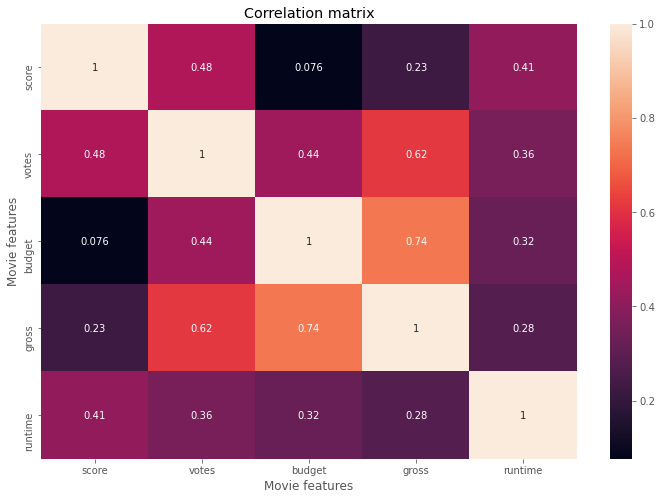

In [16]:
sns.heatmap(df.corr(), annot = True)

plt.title("Correlation matrix")
plt.xlabel("Movie features")
plt.ylabel("Movie features")


In [17]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.293012,0.188137,0.273313,0.664318,0.144064,0.620290,0.676521,0.761698,0.592327,0.111042,0.520507,0.986721,0.623651,0.084984
rating,0.293012,1.000000,0.028317,0.098542,0.220554,-0.067208,0.116554,0.203866,0.225444,0.184235,0.076627,0.243953,0.297459,0.228897,0.017432
genre,0.188137,0.028317,1.000000,0.074186,0.117828,0.047708,0.181524,0.134033,0.131703,0.145344,-0.054837,0.180424,0.185907,0.079420,0.012363
year,0.273313,0.098542,0.074186,1.000000,0.371663,0.054268,0.292267,0.198928,0.238330,0.255819,-0.035298,0.194252,0.283621,0.146056,0.037059
released,0.664318,0.220554,0.117828,0.371663,1.000000,0.107155,0.489345,0.471760,0.536440,0.430197,0.084975,0.384055,0.674002,0.396352,0.055306
score,0.144064,-0.067208,0.047708,0.054268,0.107155,1.000000,0.255136,0.185491,0.130507,0.150704,-0.048586,0.000670,0.147387,0.031146,0.063432
votes,0.620290,0.116554,0.181524,0.292267,0.489345,0.255136,1.000000,0.484062,0.529736,0.438595,0.013454,0.319024,0.631993,0.351692,0.084720
director,0.676521,0.203866,0.134033,0.198928,0.471760,0.185491,0.484062,1.000000,0.634936,0.495365,0.108433,0.435241,0.689100,0.516632,0.077003
writer,0.761698,0.225444,0.131703,0.238330,0.536440,0.130507,0.529736,0.634936,1.000000,0.499823,0.128447,0.441215,0.773963,0.519947,0.058559
star,0.592327,0.184235,0.145344,0.255819,0.430197,0.150704,0.438595,0.495365,0.499823,1.000000,0.084862,0.442090,0.604548,0.435337,0.089900


Text(87.0, 0.5, 'Movie features')

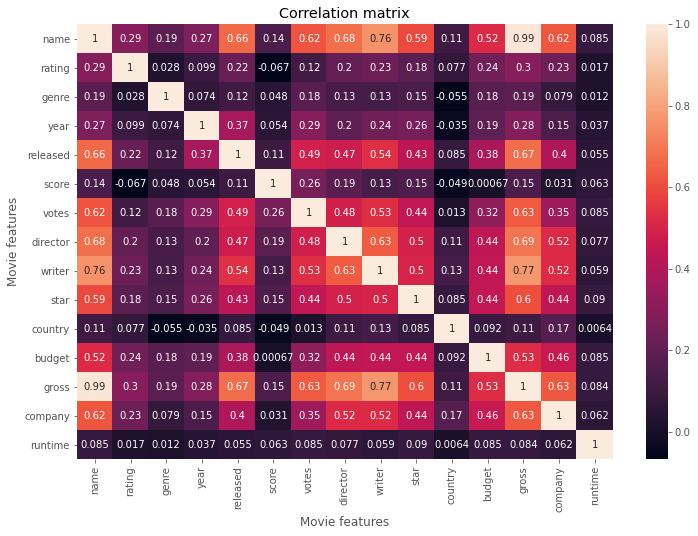

In [18]:
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(method='pearson'), annot = True)

plt.title("Correlation matrix")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

In [21]:
# Correlating each feature with other features

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.sort_values(ascending = False, inplace = True)

corr_pairs["gross"]

gross       1.000000
name        0.986721
writer      0.773963
director    0.689100
released    0.674002
votes       0.631993
company     0.628434
star        0.604548
budget      0.525363
rating      0.297459
year        0.283621
genre       0.185907
score       0.147387
country     0.110734
runtime     0.084019
dtype: float64

In [18]:
# Gross has strong correlations with : Names, Votes, Director, Writer, Star and Company.
# Gross has strongest correlations with Writer

In [22]:
df.groupby('company')[["gross"]].sum()

,gross
company,
"""DIA"" Productions GmbH & Co. KG",44350926.0
"""Weathering With You"" Film Partners",193457467.0
1492 Pictures,217256250.0
1818 Productions,12232628.0
19 Entertainment,4928883.0
...,...
double A Films,2046433.0
i am OTHER,17986781.0
i5 Films,10031529.0


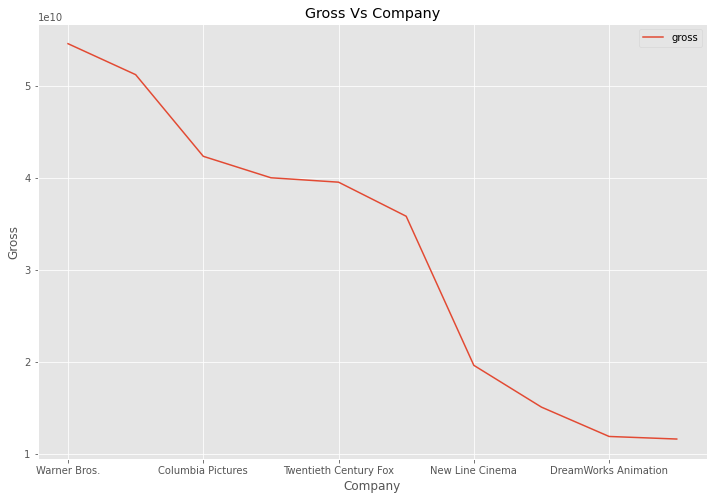

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [24]:
# Top 10 Compaies with Highest Total Gross Revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum().sort_values('gross', ascending = False)[:10]

pd.DataFrame(CompanyGrossSum).plot(xlabel="Company", ylabel="Gross", title="Gross Vs Company")
plt.show()

CompanyGrossSum.astype("int64")

In [ ]:
# Warner Bros. Company has the highest Gross value

In [25]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year             
"DIA" Productions GmbH & Co. KG     2003   44350926.0
"Weathering With You" Film Partners 2020  193457467.0
1492 Pictures                       1996  129832389.0
                                    1999   87423861.0
1818 Productions                    1983   12232628.0
...                                               ...
double A Films                      2000    2046433.0
i am OTHER                          2015   17986781.0
i5 Films                            2001   10031529.0
micro_scope                         2011    7099598.0
thefyzz                             2017   62198461.0

[2945 rows x 1 columns]

In [26]:
# Top 10 Compaies and their Year order by Total Gross Revenue

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum().sort_values(['gross', 'year'], ascending = False)[:10]

CompanyGrossSum.astype('int64')

,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
Paramount Pictures,2011,3565705182
Warner Bros.,2011,3168551343
Walt Disney Pictures,2010,3104474158
Paramount Pictures,2014,3071298586


In [128]:
# Walt Disney Pictures has the highest Gross value in 2019
# Marvel Studios has the highest Gorss value in 2018

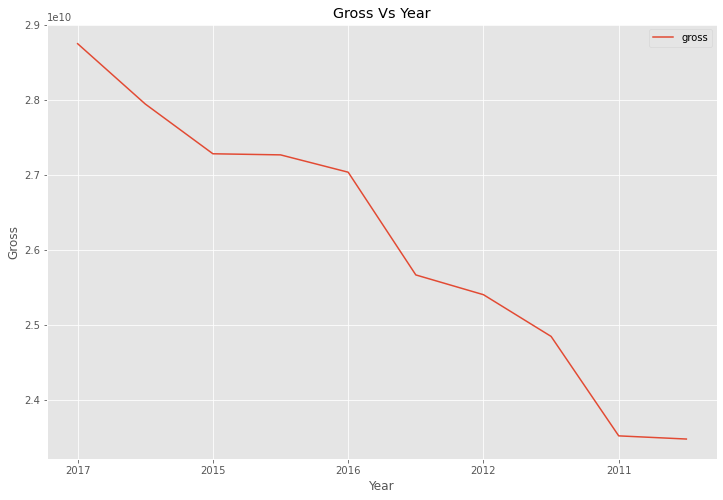

,gross
year,
2017,28750488079
2018,27945006206
2015,27280670367
2019,27266082003
2016,27034670494
2013,25663210502
2012,25399431421
2014,24842380749
2011,23514507929


In [27]:
# Top 10 Year order by Total Gross Revenue

CompanyGrossSum = df.groupby(['year'])[["gross"]].sum().sort_values(['gross', 'year'], ascending = False)[:10]

CompanyGrossSum.astype("int64").plot(xlabel="Year", ylabel="Gross", title="Gross Vs Year")
plt.show()

CompanyGrossSum.astype("int64")

In [104]:
# Movie Industry had the highest Total Gross Revenue in 2017

<AxesSubplot:xlabel='rating', ylabel='gross'>

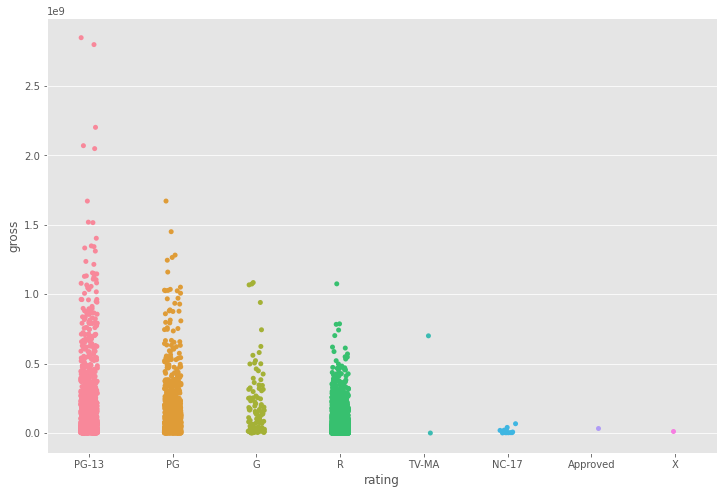

In [28]:
sns.stripplot(x="rating", y="gross", data=df)

In [29]:
# PG-13 Rating has the Highest Gross Revenue and X Rating with the lowest

In [62]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,Crimewave,PG-13,Comedy,1986,"April 25, 1986 (United States)",5.7,5300.0,Sam Raimi,Ethan Coen,Louise Lasser,United States,3000000.0,5.101000e+03,Columbia Pictures,83.0
5356,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
5357,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
5358,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [74]:
# Companies with their total runtime

df.groupby(["company"])[["runtime"]].sum().sort_values("runtime", ascending = False)[:10]

,runtime
company,
Universal Pictures,36682.0
Warner Bros.,34361.0
Columbia Pictures,33447.0
Paramount Pictures,30240.0
Twentieth Century Fox,22697.0
New Line Cinema,16650.0
Touchstone Pictures,11695.0
Walt Disney Pictures,11252.0
Metro-Goldwyn-Mayer (MGM),10511.0


In [ ]:
# Universal Pictures has the highest runtime

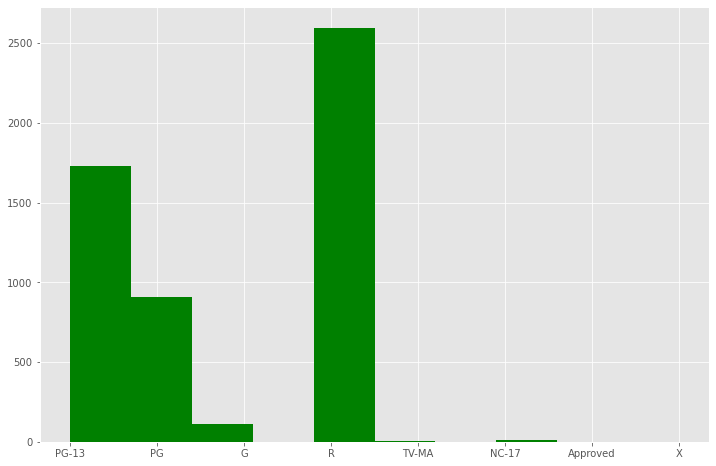

In [73]:
# Frequency of each of the ratings

rating = df["rating"].astype("string")
plt.hist(rating, color = "g")

plt.title = ("Frequency of each of the ratings")
plt.xlabel = ("Rating")
plt.ylabel = ("Frequency")

plt.show()

In [53]:
# R rated movies has the highest frequency

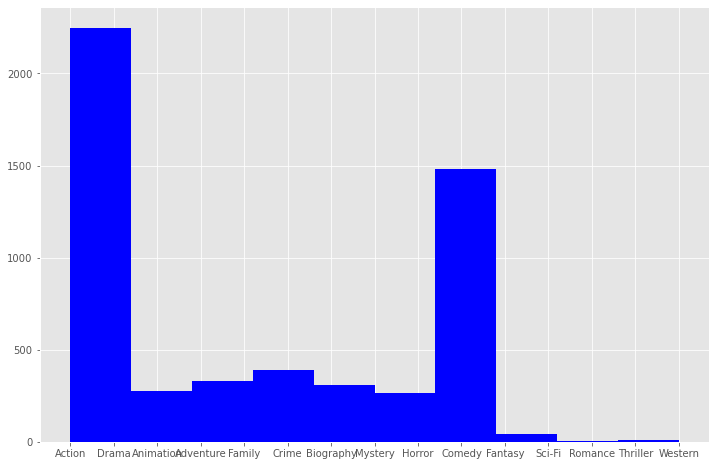

In [61]:
# Frequency of each of the Genre

genre = df["genre"].astype("string")
plt.hist(genre, color = "b")
plt.show()

In [55]:
# Action as a genre has the highest frequency